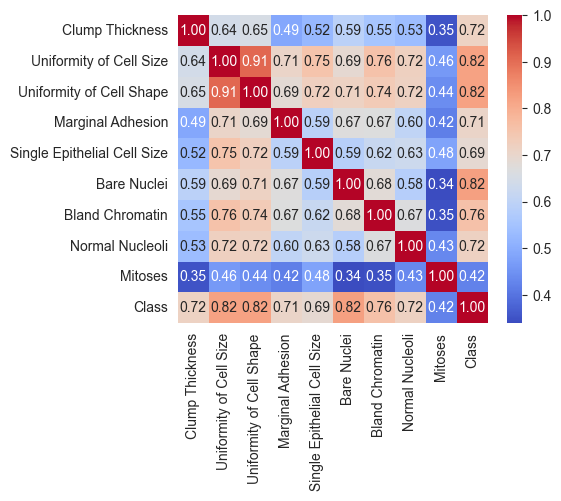

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv(r'C:\Users\rosti\Downloads\breast+cancer+wisconsin+original\breast-cancer-wisconsin.data')
dataset.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
clean_dataset = dataset.dropna()

for x in clean_dataset.index: #підчищення неправильного типу даних у колонці Bare Nuclei
    if clean_dataset.loc[x, 'Bare Nuclei']=='?':
        clean_dataset.drop(x, inplace = True)

clean_dataset = clean_dataset.astype({'Bare Nuclei':'int64', 'Sample code number':'category'}) # переведення типів відповідно до датасету

corr = clean_dataset.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f") 
plt.show() # графік, що відображає кореляції ознак між собою і з цільовою змінною (розміткою)

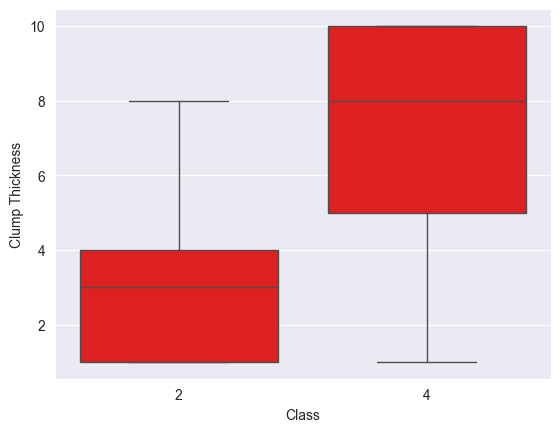

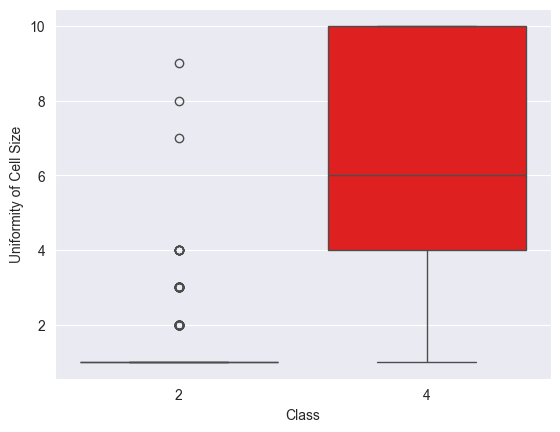

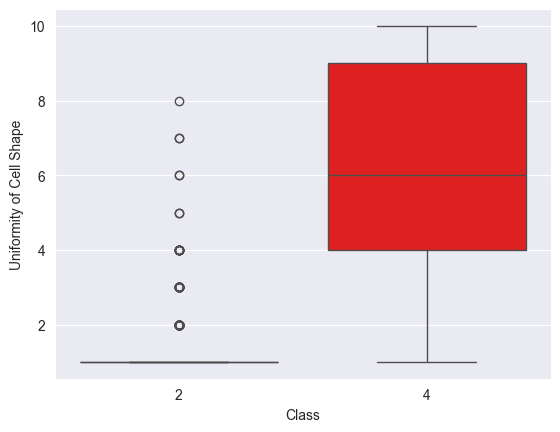

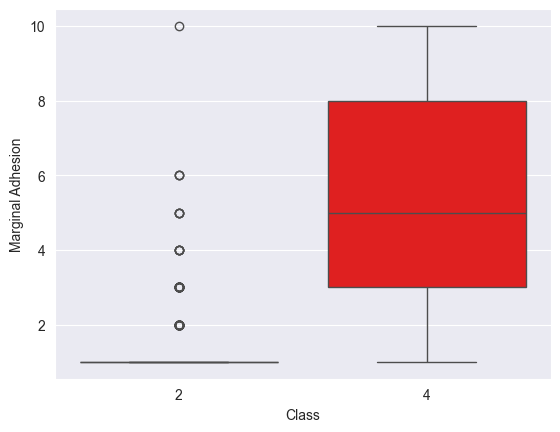

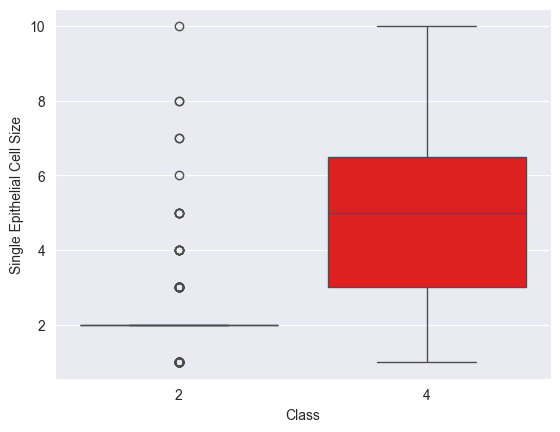

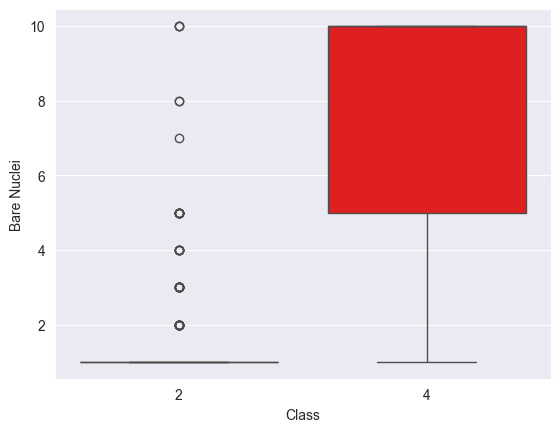

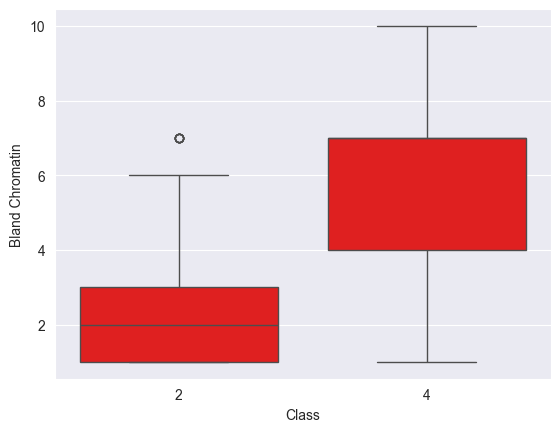

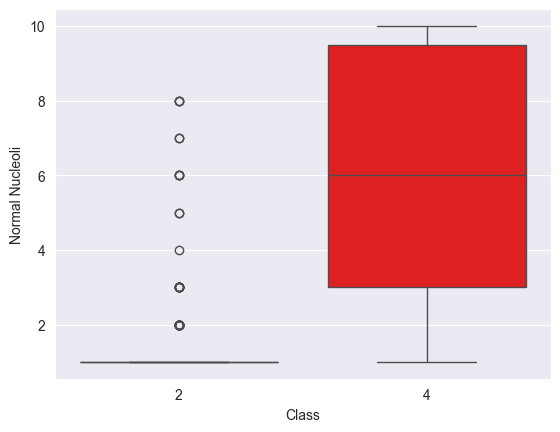

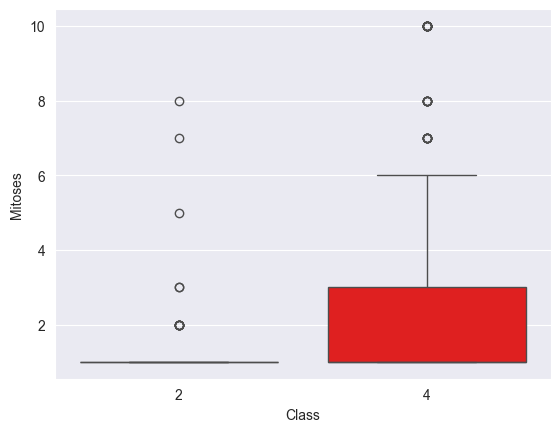

In [28]:
for i in range(1, len(clean_dataset.columns)-1): # boxplot-и ознак відносно цільової змінної
    figure = plt.figure()
    ax = sns.boxplot(x='Class', y=clean_dataset.columns[i], data=clean_dataset, color='red')

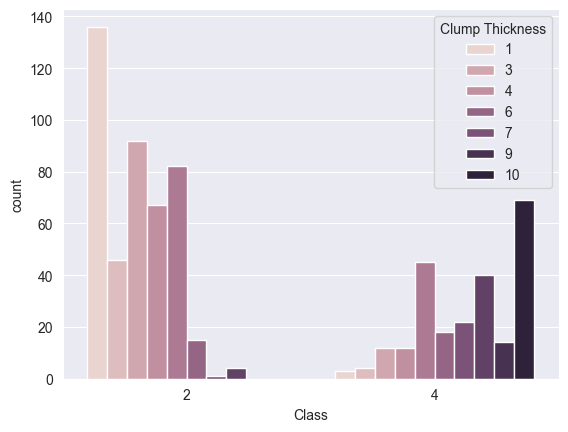

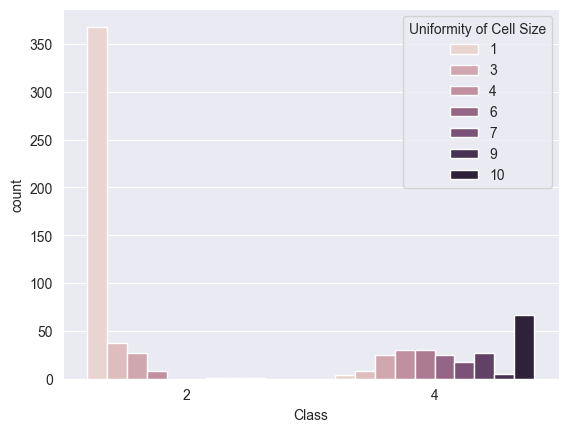

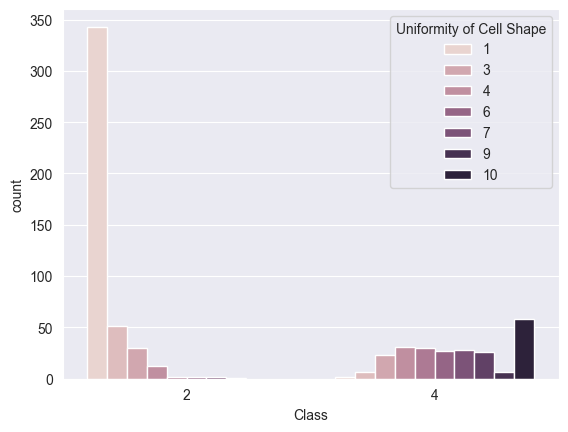

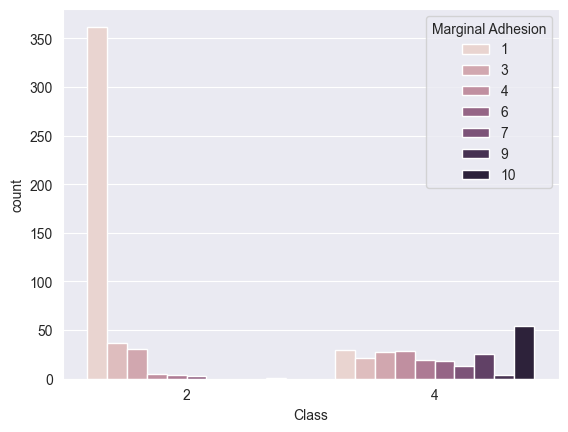

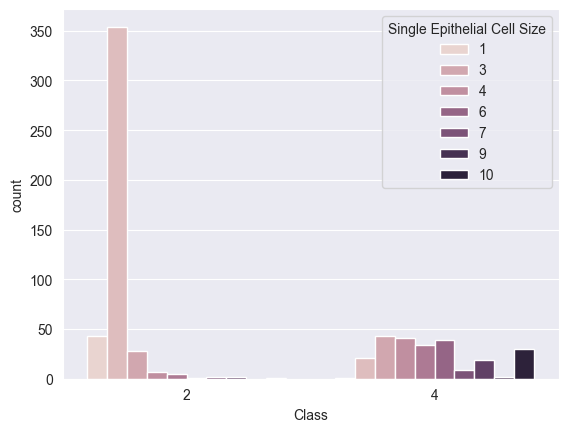

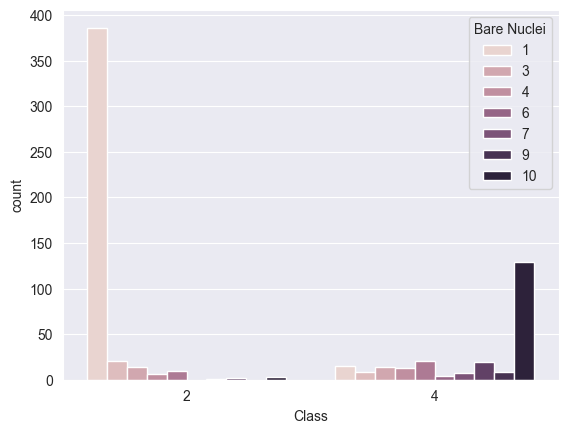

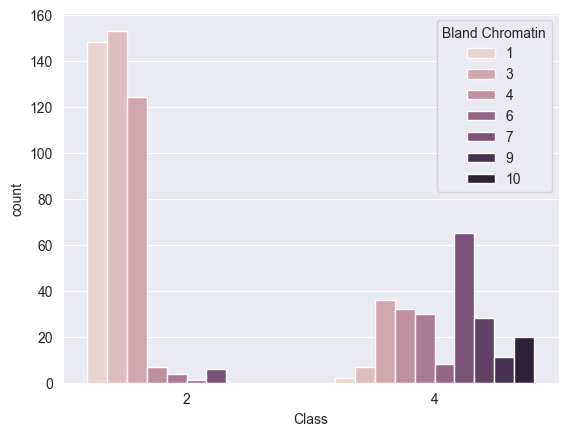

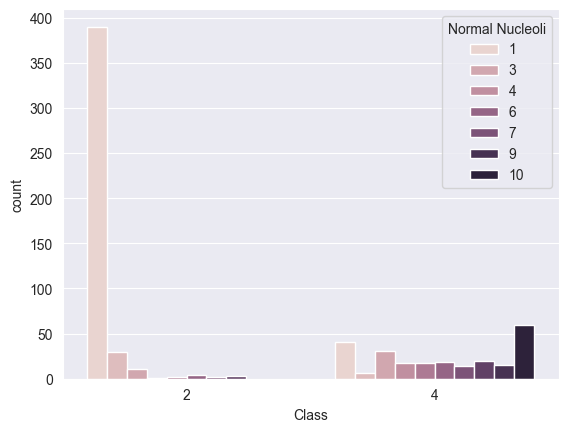

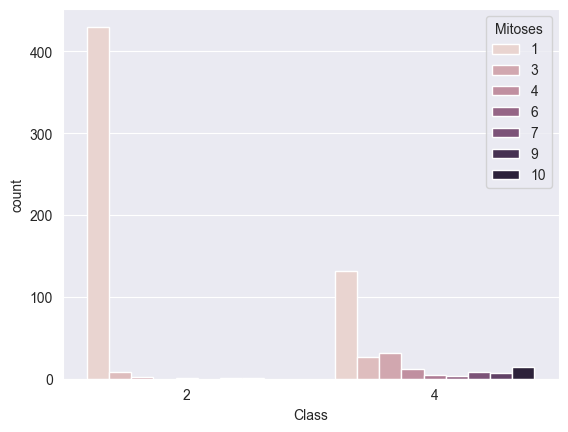

In [35]:
for i in range(1, len(clean_dataset.columns)-1): #гістограми розподілу ознак
    figure = plt.figure()
    ax = sns.countplot(x='Class',hue=clean_dataset.columns[i],data=clean_dataset)